<h1 align=\"center\"><font color='green'><font size=\"6\">  K- Nearest Neighbors </font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

 - K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks. 
  - It is non-parametric, meaning it makes no underlying assumptions about the data distribution.
 - The key idea is that it classifies or predicts a data point by considering the 'k' nearest data points (neighbors) based on a chosen distance metric (typically Euclidean distance).

### Key characteristics
 - KNN doesn't build a model but makes predictions by finding the 'k' nearest data points using a distance metric like Euclidean distance.

  -  The value of k is crucial—small k may overfit, while large k can smooth out predictions. KNN is sensitive to feature scaling and noise.

 -  KNN requires calculating distances for all data points during prediction, making it slow for large datasets and prone to the "curse of dimensionality."

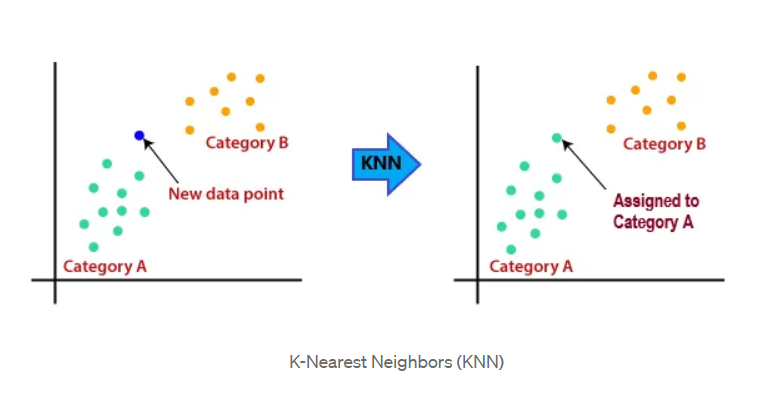

In [1]:
#In the following image the new data point has been assigned to category A
#Because the euclidean distance between new data point & category A is shorter 
#Compared to the euclidean distance between new data point & category B

### Applications 

 - Image classification: KNN classifies images by comparing features to labeled images.
 - Recommender systems: KNN suggests items based on similar user preferences.
 - Anomaly detection: KNN identifies outliers in data, useful in fraud detection and security.

In [2]:
#importing necessary libraries & algorithms
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#creating a synthetic dataset to predict membership based on age, expenditure & amount of products bought
np.random.seed(42)
data_size = 100
customer_age = np.random.randint(18, 70, size=data_size) 
total_spend = np.random.randint(5, 500, size=data_size)  
items_purchased = np.random.randint(1, 50, size=data_size)  
Membership = np.random.choice([0, 1], size=data_size, p=[0.6, 0.4])
#0 means they won't receive membership while 1 means they will receive membership

In [4]:
#creating a dataframe of the dataset
store = pd.DataFrame({
    'customer_age': customer_age,
    'total_spend': total_spend,
    'items_purchased': items_purchased,
    'Membership': Membership

})
store.head()

,customer_age,total_spend,items_purchased,Membership
0,56,305,25,0
1,69,69,39,1
2,46,349,33,0
3,32,331,1,0
4,60,13,27,1


In [5]:
#Splitting the dataset into features (customer_age,total_spend,items_purchased) and target (Membership).
# Assigning columns to Features(X) and target(y) 
X = store[['customer_age','total_spend','items_purchased']]
y = store['Membership']

#Performing an 80/20 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Standardizing the features (KNN performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Normalized data refers to data that has been scaled or transformed to a specific range or distribution.
#This is done to ensure that different features or variables have comparable scales and do not dominate the analysis.

In [7]:
#Initializing the KNN model with k=4
knn_model = KNeighborsClassifier(n_neighbors=4)

In [8]:
#Training the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
#Making predictions
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [10]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.55
Confusion Matrix:
[[11  4]
 [ 5  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.00      0.00      0.00         5

    accuracy                           0.55        20
   macro avg       0.34      0.37      0.35        20
weighted avg       0.52      0.55      0.53        20



In [11]:
new_data = pd.DataFrame({'customer_age':[28],'total_spend':[45],'items_purchased':[5]})
predict_membership = knn_model.predict(new_data)

print(f"The customer aged 28 buying 5 items and spending $45 will receive: {predict_membership} membership")

The customer aged 28 buying 5 items and spending $45 will receive: [0] membership


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [12]:
new_data = np.array([[28,45,5]])
predict_membership = knn_model.predict(new_data)

print(f"The customer aged 28 buying 5 items and spending $45 will receive: {predict_membership} membership")

The customer aged 28 buying 5 items and spending $45 will receive: [0] membership
